### Expedia Hotel Recommendations from https://www.kaggle.com/c/expedia-hotel-recommendations

### Exploratory analysis and machine learning

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_train = pd.read_csv('train.csv', nrows=150, parse_dates=['srch_ci', 'srch_co'])
data_test = pd.read_csv('test.csv', nrows=150, parse_dates=['srch_ci', 'srch_co'])

### Data analysis 

In [3]:
data_train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
data_test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


#### Correlation

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


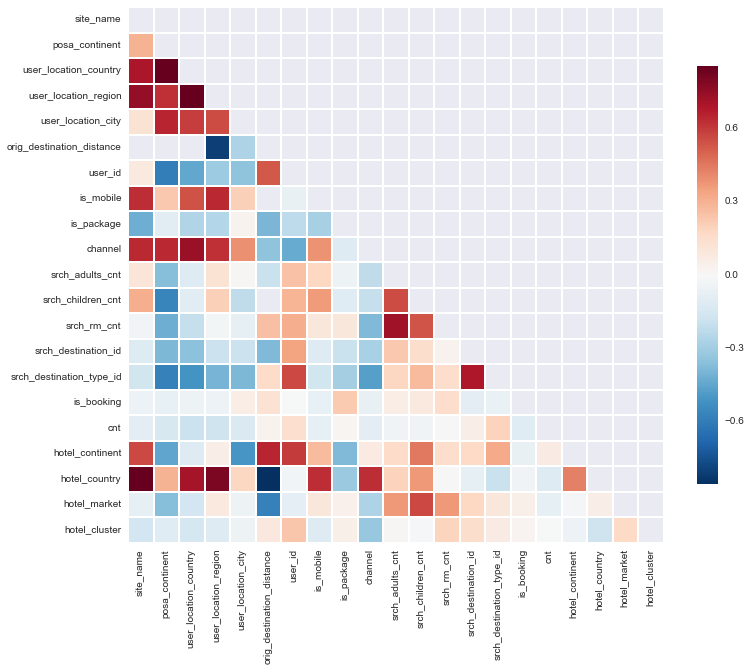

In [5]:
corr = data_train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 15))

sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

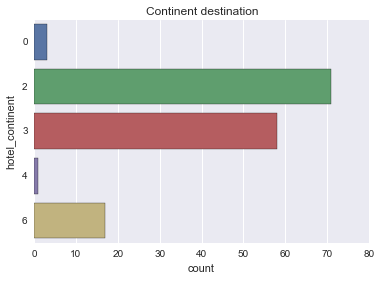

In [6]:
sns.countplot(y='hotel_continent', data=data_train)
sns.plt.title('Continent destination')
plt.show() 

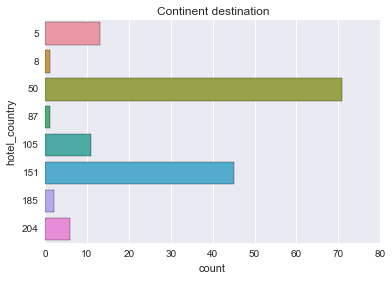

In [7]:
sns.countplot(y='hotel_country', data=data_train)
sns.plt.title('Continent destination')
plt.show() 

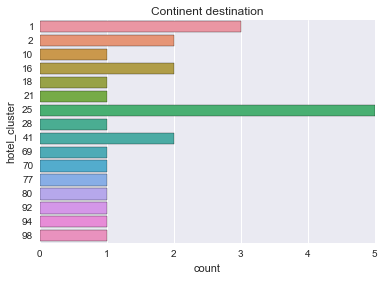

In [8]:
sns.countplot(y='hotel_cluster', data=data_train[0:25])
sns.plt.title('Continent destination')
plt.show() 

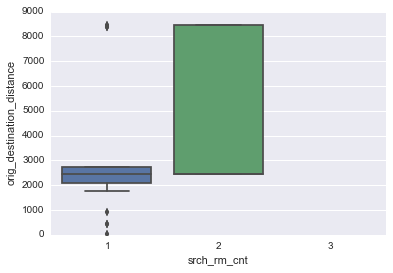

In [9]:
sns.boxplot(x='srch_rm_cnt', y='orig_destination_distance', data=data_train)

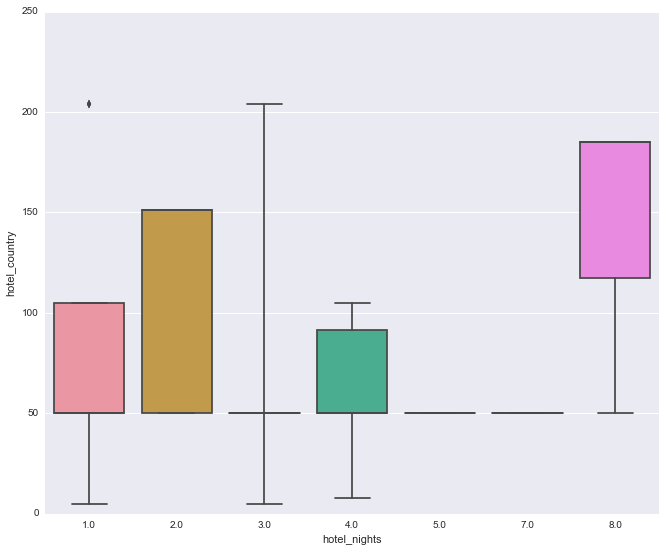

In [10]:
hotel_nights = data_train['srch_co'] - data_train['srch_ci']
hotel_nights = (hotel_nights / np.timedelta64(1, 'D')).astype(float)
data_train['hotel_nights'] = hotel_nights
plt.figure(figsize=(11, 9))
sns.boxplot(x='hotel_nights', y='hotel_country', data=data_train)

### Greedy algorithm

In [11]:
users_ids_arr = data_test['user_id']
hotels_cluster_exist = data_train['hotel_cluster']
    
# TODO
# orig_destination_distance
# srch_ci
# srch_co
# is_booking

### Machine learning

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier

gb = GradientBoostingRegressor()
lr = LinearRegression()
lg = LogisticRegressionCV()
dt = DecisionTreeClassifier()

#TODO

### Write answers

In [13]:
answer_dict = {'1': [2,3], '2': [4,5]}